# CSC592 Grad Project
## Sherwyn Braganza

Music Genre Prediction Deep Neural Network

Data : https://www.kaggle.com/datasets/purumalgi/music-genre-classification

In [13]:
import pandas as pd

df = pd.read_csv('archive/train.csv')

# checking for the number of samples
print('The dataset has {} samples\n'.format(df.shape[0]))

# finding out how many features are there and what they are
print('The dataset has {} features and they are {}\n\n'.format(df.shape[1], ", ".join(x for x in df.columns)))

print(df)


The dataset has 17996 samples

The dataset has 17 features and they are Artist Name, Track Name, Popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_in min/ms, time_signature, Class


                 Artist Name                             Track Name  \
0                 Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                     Boston                           Hitch a Ride   
2              The Raincoats                     No Side to Fall In   
3                       Deno             Lingo (feat. J.I & Chunkz)   
4      Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
...                      ...                                    ...   
17991            Green-House                              Find Home   
17992               Micatone                               All Gone   
17993        Smash Hit Combo                           Peine perdue   
17994                Be

**Artist Name and Track Name** - Descriptive features that would probably not contribute to the training of the model but helps us understand a particular sample more.

**Popularity** - Numeric feature, useful in training

**Danceability** - Numeric feature, useful in training

**Energy** - Numeric Feature, useful in training

**Key** - Categorical Feature, useful in training

**Loudness** - Numeric Feature, useful in training

**Mode** - Categorical Feature, useful in training

**Speechiness** - Numeric Feature, useful in training

**Instrumentalness** - Numeric Feature, useful in training

**Acousticness** - Numeric Feature, useful in training

**Liveness** - Numeric Feature, useful in training

**Valence** - Numeric Feature, useful in training

**Tempo** - Numeric Feature, useful in training

**Duration** - Numeric Feature, useful in training

**Time Signature** - Categorical Feature, useful in training

**Class** - Target Variable

Each class value corresponds to the genre according to the following mapping: <br>
0 - Acoustic/Folk <br>
1 - Alt Music <br>
2 - Blues <br>
3 - Bollywood <br>
4 - Country <br>
5 - Hip Hop <br>
6 - Indie <br>
7 - Instrumental <br>
8 - Metal <br>
9 - Pop <br>
10 - Rock <br>

In [104]:
import numpy as np

# removing elements with empty/NAN data
df_old_shape = df.shape[0]
df = df.dropna(axis=0, how='any')

# checking for the number of samples 
print('{} samples were removed because they had missing values. The total number left is {}\n'\
      .format(df_old_shape - df.shape[0], df.shape[0]))

percent_marks = np.asarray([6/10 * df.shape[0], 2/10 * df.shape[0]], dtype='int32')

def dfToTensor(df)->np.ndarray:
    df = df.to_numpy()
    df_data, df_labels = df[:,2:-1], df[:,-1]
    return df_data.astype('float32'), df_labels.astype('float32')
    
# splitting data into train, val and test
train = df[0:percent_marks[0]]
train_data, train_labels = dfToTensor(train)

val = df[percent_marks[0]:percent_marks[0] + percent_marks[1]]
val_data, val_labels = dfToTensor(val)

test = df[percent_marks[0] + percent_marks[1]:]
test_data, test_labels = dfToTensor(test)

print('The sizes of train, val and test are {}, {} and {} respectively'\
      .format(train.shape[0], val.shape[0], test.shape[0]))

0 samples were removed because they had missing values. The total number left is 11813

The sizes of train, val and test are 7087, 2362 and 2364 respectively


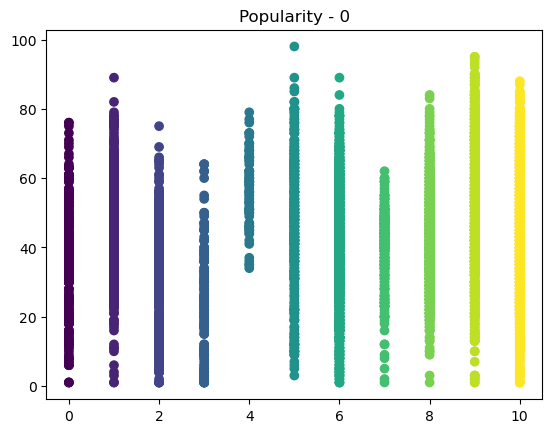

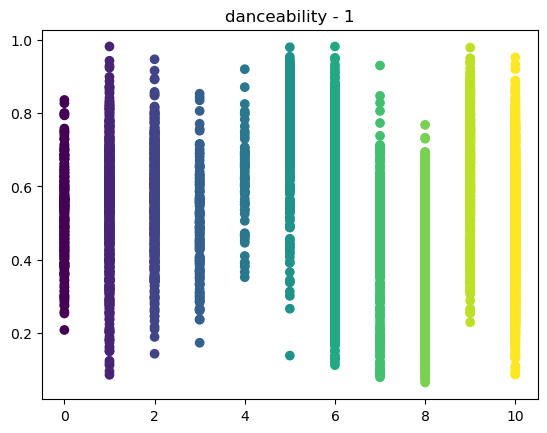

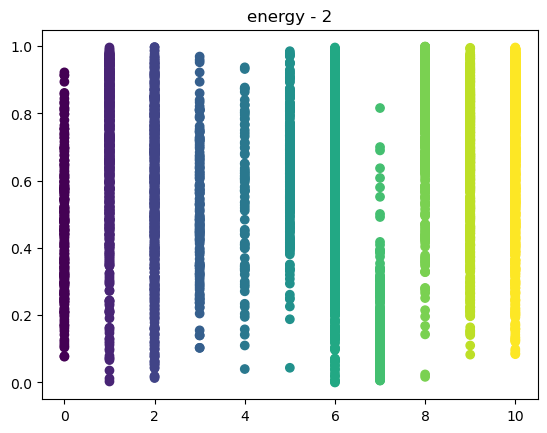

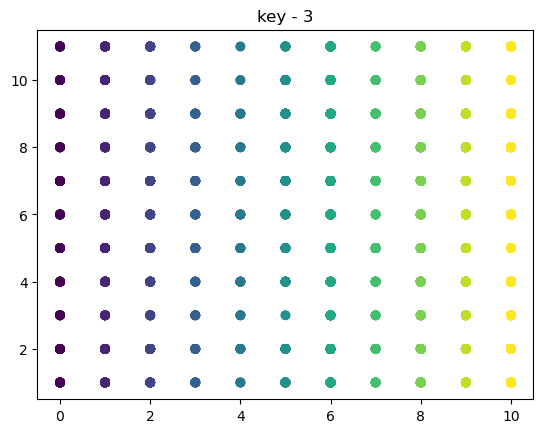

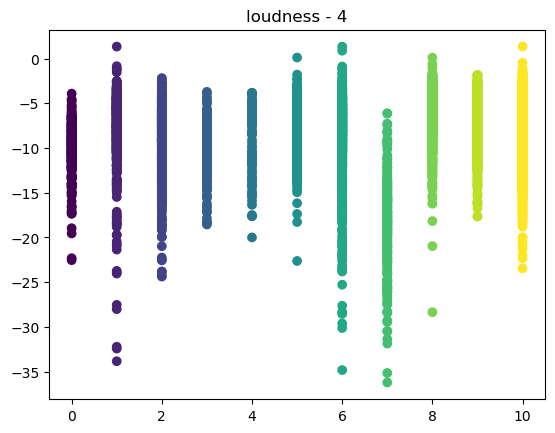

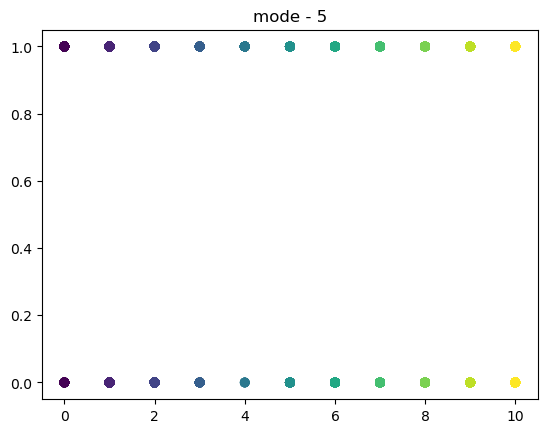

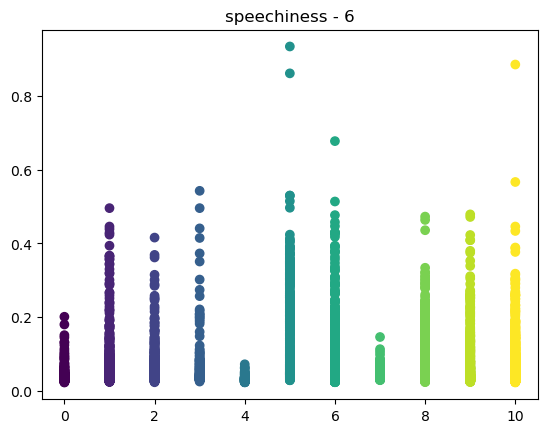

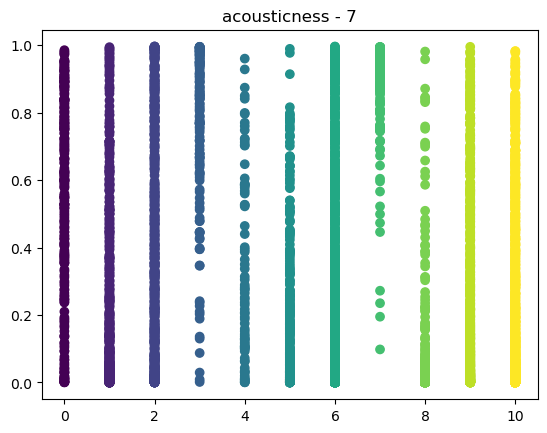

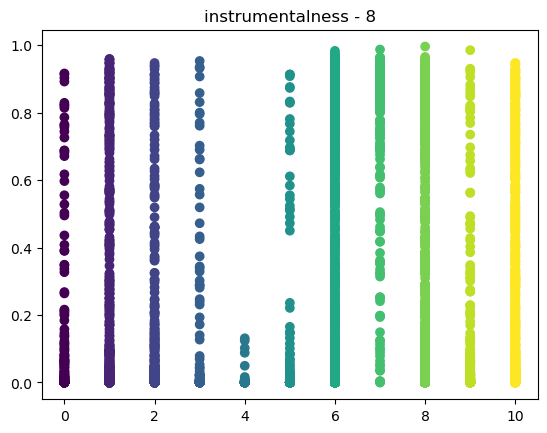

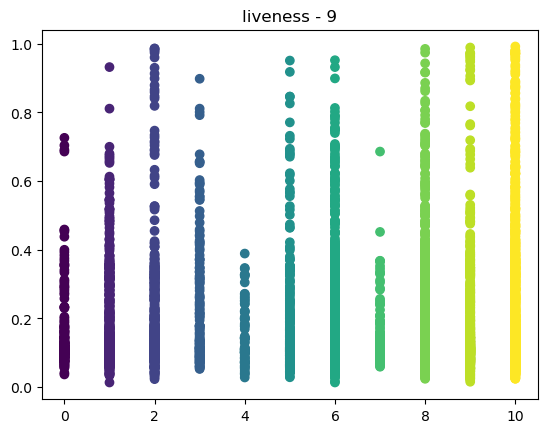

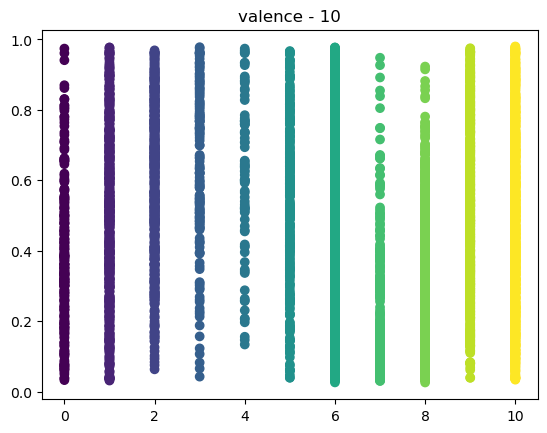

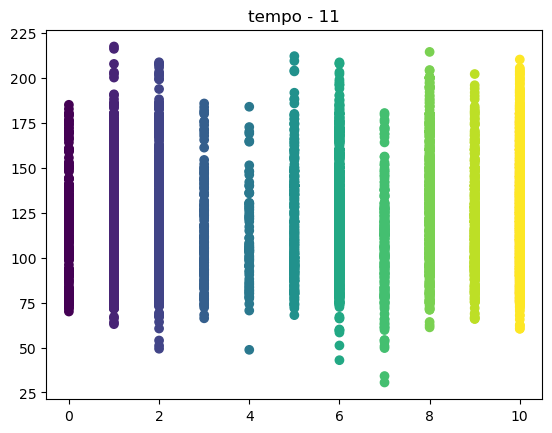

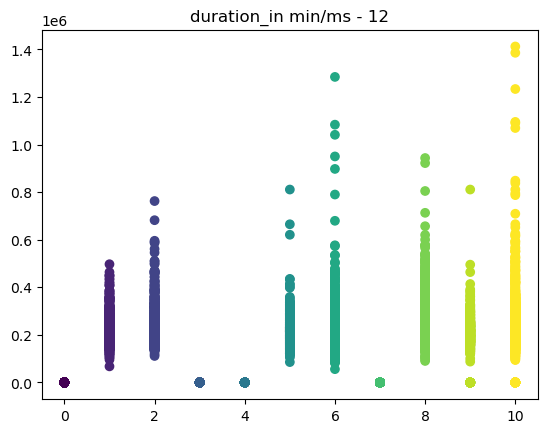

In [125]:
import matplotlib.pyplot as plt
count = 0
for col_name in train.iloc[:, 2:train.shape[1]-2]:
    plt.title(col_name + ' - ' + str(count) , loc='center')
    x_data = train.iloc[:,train.shape[1]-1].astype(float)
    y_data = train[col_name].astype(float)
    plt.scatter(x_data, y_data, c=x_data)
    plt.show()
    count+=1

Looking at the graphs, we can see that some features need to be standardized; the features

In [126]:
def scaleFeature(data):
    min_value = np.min(data, axis=0)
    max_value = np.max(data, axis=0)
    
    if min_value <= 0 and max_value <= 0:
        data = -1 * data
        max_value, min_value = -max_value, -min_value
        
    data = (data - min_value)/(max_value-min_value)
    
    return data

num_features = train_data.shape[1]

for x in [train_data, val_data, test_data]:
    for y in range(x.shape[1]):
#    for y in [0, 3, 6, 11, 12]:
        x[:,y] = scaleFeature(x[:,y])
        
        

In [142]:
# Implementing a Deep Learning Model 1

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(train_data.shape[1]))
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(11, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy", 
              metrics="accuracy")

try:
    model.load_weights('music_classifier_arch1.keras')
except:
    print('Saved model not found')
    
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="music_classifier_arch1.keras",
        save_best_only=True,
        monitor="val_accuracy")
]

model1_history = model.fit(train_data, train_labels, epochs=20, batch_size=64, 
                          validation_data=(val_data,val_labels),callbacks=callbacks)


Epoch 1/20


2022-12-05 17:53:12.863900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - ETA: 0s - loss: 1.2884 - accuracy: 0.4978

2022-12-05 17:53:15.454389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - 3s 21ms/step - loss: 1.2884 - accuracy: 0.4978 - val_loss: 1.3323 - val_accuracy: 0.4814
Epoch 2/20
111/111 [==============================] - 2s 15ms/step - loss: 1.2700 - accuracy: 0.5040 - val_loss: 1.3384 - val_accuracy: 0.4886
Epoch 3/20
111/111 [==============================] - 1s 13ms/step - loss: 1.2588 - accuracy: 0.5081 - val_loss: 1.3184 - val_accuracy: 0.4822
Epoch 4/20
111/111 [==============================] - 2s 14ms/step - loss: 1.2475 - accuracy: 0.5147 - val_loss: 1.3476 - val_accuracy: 0.4793
Epoch 5/20
111/111 [==============================] - 2s 14ms/step - loss: 1.2350 - accuracy: 0.5188 - val_loss: 1.3521 - val_accuracy: 0.4661
Epoch 6/20
111/111 [==============================] - 2s 14ms/step - loss: 1.2300 - accuracy: 0.5121 - val_loss: 1.3161 - val_accuracy: 0.4763
Epoch 7/20
111/111 [==============================] - 1s 13ms/step - loss: 1.2180 - accuracy: 0.5191 - val_loss: 1.3620 - val_accuracy: 0.4712
Epoch 8/20

In [143]:
# Implementing a Deep Learning Model #2

inputs = keras.Input(shape=(train_data.shape[1]))
x = layers.Dense(1024, activation='relu')(inputs)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
outputs = layers.Dense(11, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy", 
              metrics="accuracy")

try:
    model.load_weights('music_classifier_arch2.keras')
except:
    print('Saved model not found')
    
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="music_classifier_arch2.keras",
        save_best_only=True,
        monitor="val_accuracy")
]

model2_history = model.fit(train_data, train_labels, epochs=20, batch_size=64, 
                          validation_data=(val_data,val_labels),callbacks=callbacks)

Epoch 1/20


2022-12-05 17:53:45.105703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - ETA: 0s - loss: 1.1021 - accuracy: 0.5647

2022-12-05 17:53:47.644664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - 3s 22ms/step - loss: 1.1021 - accuracy: 0.5647 - val_loss: 1.4517 - val_accuracy: 0.4805
Epoch 2/20
111/111 [==============================] - 2s 15ms/step - loss: 1.0611 - accuracy: 0.5703 - val_loss: 1.4628 - val_accuracy: 0.4780
Epoch 3/20
111/111 [==============================] - 2s 15ms/step - loss: 1.0381 - accuracy: 0.5878 - val_loss: 1.5441 - val_accuracy: 0.4615
Epoch 4/20
111/111 [==============================] - 2s 15ms/step - loss: 1.0150 - accuracy: 0.5907 - val_loss: 1.4871 - val_accuracy: 0.4750
Epoch 5/20
111/111 [==============================] - 2s 15ms/step - loss: 0.9904 - accuracy: 0.5977 - val_loss: 1.6874 - val_accuracy: 0.4623
Epoch 6/20
111/111 [==============================] - 2s 15ms/step - loss: 0.9778 - accuracy: 0.6069 - val_loss: 1.5938 - val_accuracy: 0.4589
Epoch 7/20
111/111 [==============================] - 2s 14ms/step - loss: 0.9546 - accuracy: 0.6180 - val_loss: 1.6146 - val_accuracy: 0.4585
Epoch 8/20

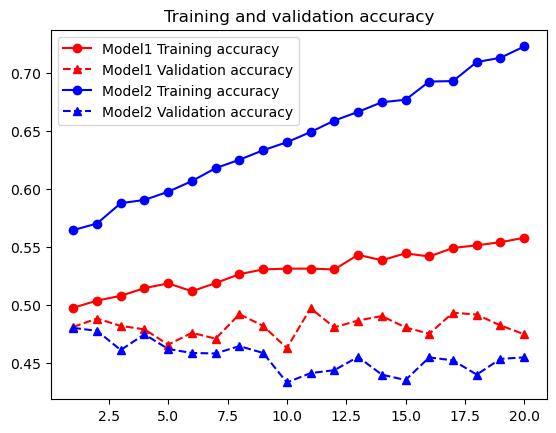

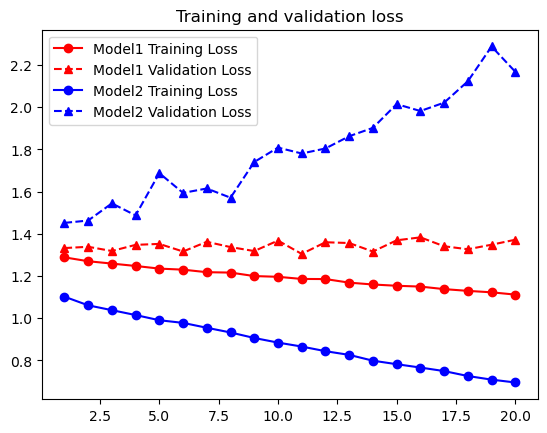

In [145]:
# Plotting

import matplotlib.pyplot as plt
model1_accuracy = model1_history.history["accuracy"]
model1_val_accuracy = model1_history.history["val_accuracy"]
model1_loss = model1_history.history["loss"]
model1_val_loss = model1_history.history["val_loss"]
model2_accuracy = model2_history.history["accuracy"]
model2_val_accuracy = model2_history.history["val_accuracy"]
model2_loss = model2_history.history["loss"]
model2_val_loss = model2_history.history["val_loss"]

epochs = range(1, len(model1_accuracy) + 1)

plt.plot(epochs, model1_accuracy, label="Model1 Training accuracy", marker='o', color='red')
plt.plot(epochs, model1_val_accuracy, label="Model1 Validation accuracy", marker='^', color='red', linestyle='--')
plt.plot(epochs, model2_accuracy, label="Model2 Training accuracy", marker='o', color='blue')
plt.plot(epochs, model2_val_accuracy, label="Model2 Validation accuracy", marker='^', color='blue', linestyle='--')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, model1_loss, label="Model1 Training Loss", marker='o', color='red')
plt.plot(epochs, model1_val_loss, label="Model1 Validation Loss", marker='^', color='red', linestyle='--')
plt.plot(epochs, model2_loss, label="Model2 Training Loss", marker='o', color='blue')
plt.plot(epochs, model2_val_loss, label="Model2 Validation Loss", marker='^', color='blue', linestyle='--')
plt.title("Training and validation loss")
plt.legend()
plt.show()

